In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

In [3]:
df_shap = pd.read_csv('models/HL-LHC-BDT/shapley_values-zh-yb2-channel.txt', sep='\t')

In [24]:
df_shap

,Unnamed: 0,njjet,ptb1,pta1,pta2,ptaa,mbb,maa,mb1h,mbbh,...,S_pta2_4,S_ptaa_4,S_mbb_4,S_maa_4,S_mb1h_4,S_mbbh_4,S_ht_4,S_drba1_4,S_dphiba1_4,class
0,0,0.0,53.0875,101.4710,23.2319,78.2469,5.69206,120.777,196.196,196.196,...,0.111413,0.056780,0.029855,-0.025718,-0.195826,-0.019164,-0.270546,0.035966,-0.045775,1
1,1,1.0,108.7530,79.9370,65.3744,114.0530,17.63020,125.546,322.945,322.945,...,-0.059173,-0.123737,0.053444,-0.016147,0.344440,0.051622,0.364416,0.328196,-0.119876,4
2,2,2.0,59.8604,104.4330,33.9398,70.8300,6.93450,118.870,203.018,203.018,...,0.022888,0.121885,0.016587,0.063264,-0.137917,-0.039513,0.254253,0.007237,-0.047004,1
3,3,0.0,64.1093,80.3534,53.3475,27.2393,10.26960,130.979,188.212,188.212,...,-0.016599,0.437822,0.027209,-0.013429,-0.253169,-0.021203,0.228742,-0.104154,0.084739,1
4,4,0.0,30.3711,58.2027,35.9209,48.0775,3.53102,126.652,313.577,313.577,...,0.057868,0.486264,0.102610,0.004246,0.854291,0.014426,-0.202106,0.277711,0.038060,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,0.0,66.0773,83.3752,49.8704,61.3103,6.82133,125.437,215.536,215.536,...,-0.051272,0.199617,0.048313,-0.001514,0.017056,-0.027220,-0.313001,0.000613,0.004626,1
11996,11996,1.0,46.3750,69.8608,43.2893,96.6055,5.44940,118.487,280.127,280.127,...,0.021634,-0.209916,0.086281,0.054162,0.398560,0.064608,-0.261937,0.009318,-0.014607,1
11997,11997,0.0,117.5100,147.2310,86.9642,202.2300,90.52250,122.210,352.379,419.305,...,-0.082010,-1.089426,-0.737231,-0.033374,0.307592,0.033770,0.178710,-0.071131,0.033955,1
11998,11998,2.0,99.5804,68.3585,65.8321,44.2415,5.11221,127.680,232.778,232.778,...,-0.094404,0.259733,0.046396,-0.073771,0.040750,-0.044663,0.123509,-0.212387,0.159385,4


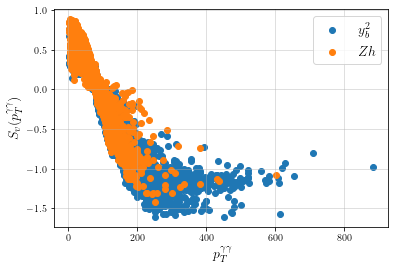

In [30]:
plt.scatter(df_shap[df_shap['class']==1].ptaa, df_shap[df_shap['class']==1].S_ptaa_4, label=r"$y_b^2$")
plt.scatter(df_shap[df_shap['class']==4].ptaa, df_shap[df_shap['class']==4].S_ptaa_4, label=r"$Zh$")
plt.xlabel(r"$p_T^{\gamma\gamma}$", fontsize=14)
plt.ylabel(r"$S_v(p_T^{\gamma\gamma})$", fontsize=14)
plt.grid(':', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

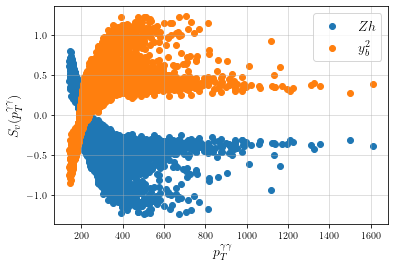

In [20]:
plt.scatter(df_shap.mb1h, df_shap.S_mb1h_1, label=r"$Zh$")
plt.scatter(df_shap.mb1h, df_shap.S_mb1h_4, label=r"$y_b^2$")
plt.xlabel(r"$p_T^{\gamma\gamma}$", fontsize=14)
plt.ylabel(r"$S_v(p_T^{\gamma\gamma})$", fontsize=14)
plt.grid(':', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

In [39]:
df_tmp = df_shap[['S_ptaa_4', 'S_ptaa_1']]

In [82]:
key_list = ['S_njjet_', 'S_ptb1_', 'S_pta1_', 'S_pta2_', 'S_ptaa_', 'S_mbb_',
            'S_maa_', 'S_mb1h_', 'S_mbbh_', 'S_ht_', 'S_drba1_', 'S_dphiba1_']

for key in key_list:
    yb_val = df_shap[key+'4'].abs().mean()
    zh_val = df_shap[key+'1'].abs().mean()
    diff = np.abs(200 * (yb_val - zh_val)/(yb_val + zh_val))
    print('{:10s}: yb2: {:1.6f} || Zh = {:1.6f} || diff: {:2.2f}%'.format(key[:-1], yb_val, zh_val, diff))

S_njjet   : yb2: 0.046118 || Zh = 0.040816 || diff: 12.20%
S_ptb1    : yb2: 0.227554 || Zh = 0.225522 || diff: 0.90%
S_pta1    : yb2: 0.100003 || Zh = 0.097992 || diff: 2.03%
S_pta2    : yb2: 0.054822 || Zh = 0.054054 || diff: 1.41%
S_ptaa    : yb2: 0.449009 || Zh = 0.451993 || diff: 0.66%
S_mbb     : yb2: 0.200910 || Zh = 0.203150 || diff: 1.11%
S_maa     : yb2: 0.023385 || Zh = 0.023891 || diff: 2.14%
S_mb1h    : yb2: 0.283417 || Zh = 0.279520 || diff: 1.38%
S_mbbh    : yb2: 0.043576 || Zh = 0.045941 || diff: 5.28%
S_ht      : yb2: 0.199413 || Zh = 0.196426 || diff: 1.51%
S_drba1   : yb2: 0.065629 || Zh = 0.064083 || diff: 2.38%
S_dphiba1 : yb2: 0.048350 || Zh = 0.046665 || diff: 3.55%


In [79]:
for i in range(10):
    yb_val = df_shap.iloc[i][25:36].sum()
    zh_val = df_shap.iloc[i][14:25].sum()
    diff = np.abs(200 * (yb_val + zh_val)/(yb_val - zh_val))
    print('{:5s}: yb2: {:-2.6f} || Zh = {:-2.6f} || diff: {:2.2f}%'.format(str(i), yb_val, zh_val, diff))

0    : yb2: -0.469287 || Zh = 0.523911 || diff: 11.00%
1    : yb2: 0.711554 || Zh = -0.788804 || diff: 10.30%
2    : yb2: -0.038724 || Zh = -0.204066 || diff: 293.68%
3    : yb2: 0.092339 || Zh = 0.030748 || diff: 399.69%
4    : yb2: 2.200698 || Zh = -2.121355 || diff: 3.67%
5    : yb2: -1.792857 || Zh = 1.781623 || diff: 0.63%
6    : yb2: -0.232498 || Zh = 0.173665 || diff: 28.97%
7    : yb2: 0.092275 || Zh = 0.011514 || diff: 257.03%
8    : yb2: 2.138781 || Zh = -2.390957 || diff: 11.13%
9    : yb2: 0.909692 || Zh = -1.028797 || diff: 12.29%


In [72]:
df_shap.iloc[0][25:36].sum()

-0.46928718700000005

In [20]:
df_tmp[df_tmp['class']==2]['S_maa_4'].abs().mean()

0.22142408026540383

In [30]:
df_tmp[df_tmp['class']==1]['S_ptaa_4'].abs().mean()

0.4824207498614773

In [22]:
df_tmp[df_tmp['class']==0]['S_maa_4'].abs().mean()

0.7616166397701345

In [42]:
df_shap

Index(['Unnamed: 0', 'njjet', 'ptb1', 'pta1', 'pta2', 'ptaa', 'mbb', 'maa',
       'mb1h', 'mbbh', 'ht', 'drba1', 'dphiba1', 'S_njjet_1', 'S_ptb1_1',
       'S_pta1_1', 'S_pta2_1', 'S_ptaa_1', 'S_mbb_1', 'S_maa_1', 'S_mb1h_1',
       'S_mbbh_1', 'S_ht_1', 'S_drba1_1', 'S_dphiba1_1', 'S_njjet_4',
       'S_ptb1_4', 'S_pta1_4', 'S_pta2_4', 'S_ptaa_4', 'S_mbb_4', 'S_maa_4',
       'S_mb1h_4', 'S_mbbh_4', 'S_ht_4', 'S_drba1_4', 'S_dphiba1_4', 'class'],
      dtype='object')